# what's this project about ?
we wanto to make a deep learning model by CNN 

## Frameworks
 Tensorflow / Keras / Pytorch

## About data and target
we have a dataset involve 5 types of rices we want to make a model that it can predict the types of rices

## Dataset :
https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset

# Import libraries

In [54]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import splitfolders

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D , Activation , MaxPooling2D , Flatten , Dense 

import torch
from   torchvision.utils import make_grid
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# Separt the data
in this step we want to separt the data to train, validation and test parts

In [8]:
# input_folder = "D:\IT\IMT Courses\Deep Learning\CNN\Projects\P2 (Final Project)\Data"
# output = "D:\IT\IMT Courses\Deep Learning\CNN\Projects\P2 (Final Project)"
# splitfolders.ratio(input_folder , output=output , ratio=(.7 ,.2 , .1))

# Import the data

## The things wee need 

In [9]:
batch_size=32

train_directory = r"D:\IT\IMT Courses\Deep Learning\CNN\Projects\P2 (Final Project)\Separated data\train"
Validation_directory = r"D:\IT\IMT Courses\Deep Learning\CNN\Projects\P2 (Final Project)\Separated data\val"
Test_directory = r"D:\IT\IMT Courses\Deep Learning\CNN\Projects\P2 (Final Project)\Separated data\test"

classes = ('Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag') # We need this for pytorch

## Import data for keras

In [10]:
Train = keras.utils.image_dataset_from_directory(
        directory = train_directory,
        labels = 'inferred',
        label_mode = 'categorical',
        batch_size= batch_size,
        image_size=(256,256))

Validation = keras.utils.image_dataset_from_directory(
        directory = Validation_directory,
        labels = 'inferred',
        label_mode = 'categorical',
        batch_size = batch_size,
        image_size = (256 , 256))

Test = keras.utils.image_dataset_from_directory(
        directory = Test_directory,
        labels = 'inferred',
        label_mode = 'categorical',
        batch_size= batch_size,
        image_size=(256 , 256))

print('Trian classes names :' , Train.class_names ,'\n' ,
      'Validation classes names :' , Validation.class_names ,'\n' ,
      'Test classes names :' , Test.class_names)

Found 52500 files belonging to 5 classes.
Found 15000 files belonging to 5 classes.
Found 7500 files belonging to 5 classes.
Trian classes names : ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag'] 
 Validation classes names : ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag'] 
 Test classes names : ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


## Import data for pytorch

In [25]:
# Normalize and transform the data to tensoe
transform = transforms.Compose([transforms.ToTensor(),transforms.Resize((227,227)),
                                transforms.Normalize((0.4914, 0.4822, 0.4465) , (0.2023, 0.1994, 0.2010))])


# Import train data for pytorch
Training_data = datasets.ImageFolder(root=train_directory , transform=transform)
TrainData = torch.utils.data.DataLoader(dataset=Training_data,batch_size=64,shuffle=True,num_workers=2)

# Import validatin data for pytorch
Validatin_data = datasets.ImageFolder(root=Validation_directory , transform=transform)
ValidatinData = torch.utils.data.DataLoader(dataset=Validatin_data , batch_size=64,shuffle=True,num_workers=2)

# Import test data for pytorch
Test_data = datasets.ImageFolder(root=Test_directory , transform=transform)
TestData = torch.utils.data.DataLoader(dataset=Test_data , batch_size=1 , shuffle=True)

# Lets take a look to data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


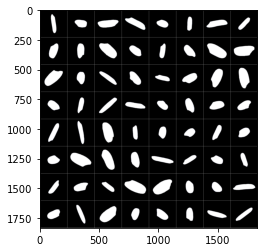

Basmati Karacadag Jasmine Jasmine Karacadag Jasmine Jasmine Jasmine Arborio Arborio Ipsala Arborio Jasmine Arborio Ipsala Ipsala Ipsala Karacadag Basmati Arborio Jasmine Arborio Ipsala Ipsala Karacadag Jasmine Basmati Basmati Karacadag Arborio Arborio Arborio


In [6]:
def imshow(image):
    image = image/2 + 0.5
    npimage = image.numpy()
    plt.imshow(np.transpose(npimage , (1,2,0)))
    plt.show()

dataiter = iter(TrainData)
images , labels = next(dataiter)
imshow(make_grid(images))

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# Make model with tensorflow 

In [7]:
#Make CNN model
CNN = Sequential()
CNN.add(Conv2D(filters=32 , kernel_size=3 , activation='relu' , input_shape=[256,256,3]))
CNN.add(MaxPooling2D(pool_size=2 , strides=2))
CNN.add(Flatten())
CNN.add(Dense(units=512 , activation='relu'))
CNN.add(Dense(units=5 , activation='softmax'))
CNN.summary()

#Compile the model
CNN.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

#Fit the model
tf_CNN_model = CNN.fit(x=Train , validation_data=Validation , epochs=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 516128)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               264258048 
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
Total params: 264,261,509
Trainable params: 264,261,509
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1641/1641 [==============================] - 2269s 1s/step - loss: 9.4546 - accuracy: 0.9530 - val

## Save model
we do not need train the model for using eachtime so we can save it and just load it whenever we need 

In [32]:
tensorflowPatch = r'D:\IT\IMT Courses\Deep Learning\CNN\Projects\P2 (Final Project)'
model_save_path = tf.keras.models.save_model(
    CNN, tensorflowPatch, overwrite=True, save_format='tf')

INFO:tensorflow:Assets written to: D:\IT\IMT Courses\Deep Learning\CNN\Projects\P2 (Final Project)\assets


## Plots

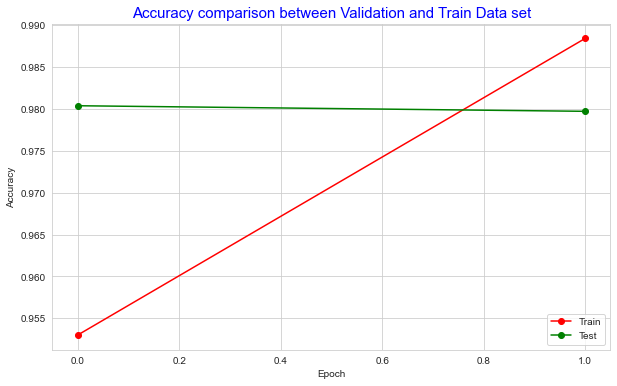

In [10]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plt.plot(tf_CNN_model.history['accuracy'] , color='r' , marker='o')
plt.plot(tf_CNN_model.history['val_accuracy'] , color='g' , marker='o')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15 , color='b')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

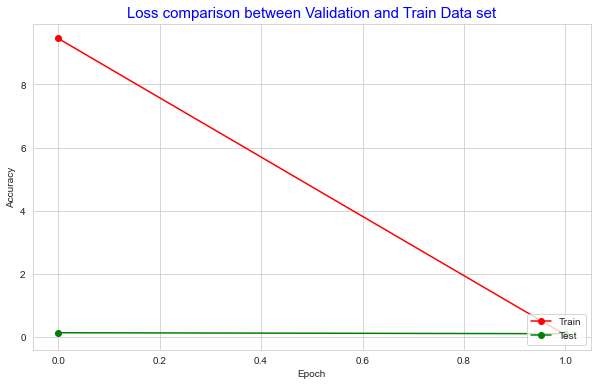

In [11]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plt.plot(tf_CNN_model.history['loss'] , color='r' , marker='o')
plt.plot(tf_CNN_model.history['val_loss'] , color='g' , marker='o')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15 , color='b')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

## Evaluate with real data

X_test shape :  (3200, 256, 256, 3) y_test shape :  (3200, 5)
accuracy score :  0.98
              precision    recall  f1-score   support

     Arborio       0.94      0.99      0.96       637
     Basmati       1.00      0.98      0.99       622
      Ipsala       1.00      1.00      1.00       645
     Jasmine       0.98      0.99      0.98       639
   Karacadag       1.00      0.94      0.97       657

   micro avg       0.98      0.98      0.98      3200
   macro avg       0.98      0.98      0.98      3200
weighted avg       0.98      0.98      0.98      3200
 samples avg       0.98      0.98      0.98      3200



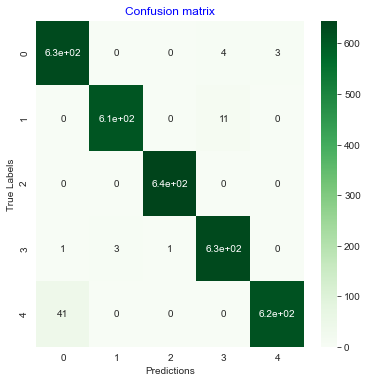

In [54]:
#A loop for mine the images with it labels from Test
X_test, y_test = None, None
for images, labels in Test.take(100):
    if X_test == None or y_test == None:
        X_test = images
        y_test = labels
    else:
        X_test = tf.concat([X_test, images], axis = 0)
        y_test = tf.concat([y_test, labels], axis = 0)
                
print('X_test shape : ' , X_test.shape , 'y_test shape : ' , y_test.shape)

y_pred_proba = CNN.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Convert y_pred to one-hot encoded format
y_pred_onehot = np.zeros_like(y_test)
y_pred_onehot[np.arange(len(y_pred)), y_pred]=1

y_pred = y_pred_onehot

print('accuracy score : ', metrics.accuracy_score(y_test, y_pred))

labels = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
print(classification_report(y_test, y_pred, target_names=labels))

#Confusion matrix plot
plt.figure(figsize=(6, 6))
sns.heatmap(metrics.confusion_matrix(np.argmax(y_test , axis=1), np.argmax(y_pred , axis=1)), annot=True, cmap='Greens')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.title('Confusion matrix' , color='b')
plt.show()

## Input cell for predicition

In [55]:
test_image = tf.keras.utils.load_img(r"D:\IT\IMT Courses\Deep Learning\CNN\Projects\P2 (Final Project)\Separated data\test\Jasmine\Jasmine (2).jpg",
                                     target_size=(256, 256))
test_image = tf.keras.utils.array_to_img(test_image)
test_image = np.expand_dims(test_image , axis=0)
predict = CNN.predict(test_image)
print(predict)

[[0.0000000e+00 1.2028224e-35 0.0000000e+00 1.0000000e+00 0.0000000e+00]]


# Make model with pytorch

# AlexNet

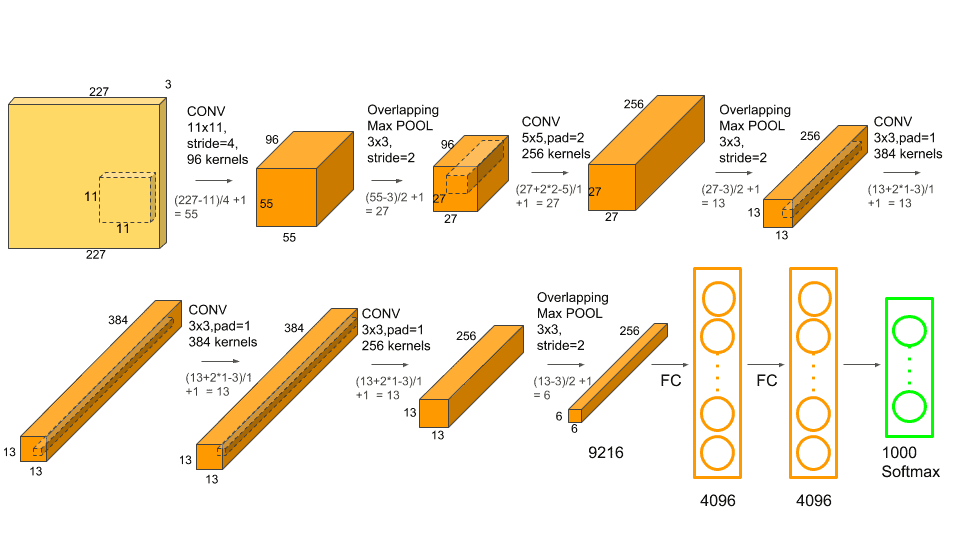

In [50]:
class AlexNet(nn.Module):
    def __init__(self , num_classes):
        super(AlexNet,self).__init__()
        
        self.layer1 = nn.Sequential(
                      nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0),
                      nn.BatchNorm2d(96),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=3 , stride=2))
        
        self.layer2 = nn.Sequential(
                      nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
                      nn.BatchNorm2d(256),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=3 , stride=2))
        
        self.layer3 = nn.Sequential(
                      nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
                      nn.BatchNorm2d(384),
                      nn.ReLU())
        
        self.layer4 = nn.Sequential(
                      nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
                      nn.BatchNorm2d(384),
                      nn.ReLU())
        
        self.layer5 = nn.Sequential(
                      nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
                      nn.BatchNorm2d(256),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=3 , stride=2))
        
        self.fc1 = nn.Sequential(
                   nn.Dropout(0.5),
                   nn.Linear(9216, 4096),
                   nn.ReLU())
        
        self.fc2 = nn.Sequential(
                   nn.Dropout(0.5),
                   nn.Linear(4096, 4096),
                   nn.ReLU())
        
        self.fc3 = nn.Sequential(
                   nn.Linear(4096, num_classes),
                   nn.Softmax())
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        
        out = out.reshape(out.size(0),-1)
        
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out

num_classes = 5
alexnet = AlexNet(num_classes)

## Set loss and optimizer function

In [51]:
Loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=0.005, weight_decay=0.005, momentum=0.9)

## Train the model

In [52]:
num_epoch = 1
for num_epoch in range(num_epoch):
    
    runnig_loss=0
    for index,data in enumerate(TrainData):
        
        inputs,labels = data
        optimizer.zero_grad()
        output = alexnet(inputs)
        loss = Loss(output,labels)
        loss.backward()
        optimizer.step()
        
        runnig_loss += loss.item()
        if index%200 == 199:
            print('[Epoch {} , Batch{}]  Loss: {:.3f}'.format(num_epoch+1, index+1, runnig_loss/200))
            runnig_loss = 0
            
print('Finsh Training')

C:\Users\moham\anaconda3\lib\site-packages\torch\nn\modules\container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[Epoch 1 , Batch200]  Loss: 1.079
[Epoch 1 , Batch400]  Loss: 0.937
[Epoch 1 , Batch600]  Loss: 0.923
[Epoch 1 , Batch800]  Loss: 0.922
Finsh Training


## Evaluate the model

In [53]:
val_loss = 0
correct = 0
total = 0
with torch.no_grad():
    alexnet.eval()
    for ValData in ValidatinData:
        inputs, labels = ValData
        outputs = alexnet(inputs)
        val_loss += Loss(outputs, labels).item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    val_loss /= len(ValidatinData)  # Correct indentation here
    val_acc = correct / total

print(f'Validation {val_loss:.3f} , Validation Accuracy: {val_acc:.3f}')


Validation 0.923 , Validation Accuracy: 0.984


## Save model

In [18]:
pytorch_patch = r'D:/IT/IMT Courses/Deep Learning/CNN/Projects/P2_Final_Project_pytorch.pth'
torch.save(alexnet.state_dict() , pytorch_patch)

# Transfer Learning
## Do we really need to write that a lots of code like classes ?
the awnser is NO ! We can use Transfer Learning 
## What is Transfer Learning ?
in Transfer Learning we use a pretrained model so we dont need to make classes any more and we have the best wight becuse that trained for many time before and we just need to change amounts the last lyee and put it amount our classes insted of  

## Import library 
first we need to import the library for having access to models 

In [3]:
import torchvision.models as models

## Import the model
now we need to chang the amount of the last lyer to number our classes 

In [12]:
num_classes = 5
AlexNet = models.alexnet(pretrained=True)
AlexNet.classifier[6] = nn.Linear(4096 , num_classes)

## Set loss and optimizer function

In [13]:
Loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(AlexNet.parameters(), lr=0.005, weight_decay=0.005, momentum=0.9)

## Train the model
it's like abouve 

In [14]:
num_epoch = 1
for num_epoch in range(num_epoch):
    
    runnig_loss=0
    for index,data in enumerate(TrainData):
        
        inputs,labels = data
        optimizer.zero_grad()
        output = AlexNet(inputs)
        loss = Loss(output,labels)
        loss.backward()
        optimizer.step()
        
        runnig_loss += loss.item()
        if index%200 == 199:
            print('[Epoch {} , Batch{}]  Loss: {:.3f}'.format(num_epoch+1, index+1, runnig_loss/200))
            runnig_loss = 0
            
print('Finsh Training')

[Epoch 1 , Batch200]  Loss: 0.996
[Epoch 1 , Batch400]  Loss: 0.402
[Epoch 1 , Batch600]  Loss: 0.218
[Epoch 1 , Batch800]  Loss: 0.087
Finsh Training


## Evaluate the model
like above 

In [15]:
val_loss = 0
correct = 0
total = 0
with torch.no_grad():
    AlexNet.eval()
    for ValData in ValidatinData:
        inputs, labels = ValData
        outputs = AlexNet(inputs)
        val_loss += Loss(outputs, labels).item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    val_loss /= len(ValidatinData)  # Correct indentation here
    val_acc = correct / total

print(f'Validation {val_loss:.3f} , Validation Accuracy: {val_acc:.3f}')

Validation 0.043 , Validation Accuracy: 0.988


## Save model

In [41]:
pytorch_path = r'D:/IT/IMT Courses/Deep Learning/CNN/Projects/P2_Final_Project_pytorch_Transfer Learning.pth'
torch.save(AlexNet.state_dict() , pytorch_patch)

## Load the model 

In [42]:
StateDict = torch.load(r"D:\IT\IMT Courses\Deep Learning\CNN\Projects\P2_Final_Project_pytorch_Transfer Learning.pth")
AlexNet.load_state_dict(StateDict)

<All keys matched successfully>

## Input cell for predicting

In [80]:
image_path = r"D:\IT\IMT Courses\Deep Learning\CNN\Projects\P2 (Final Project)\Separated data\test\Arborio\Arborio (42).jpg"
image = Image.open(image_path)

image = transform(image) 
image = image.unsqueeze(0) #add a batch dimension

# Set the model to evaluation mode
AlexNet.eval()

# with torch.no_grad():
predict = AlexNet(image)
predicted_class_index = torch.argmax(predict).item()

# For showing the label of index
def show_label(predicted_class_index):
    if predicted_class_index == 0:
        print('Arborio')
    elif predicted_class_index == 1:
        print('Basmati')
    elif predicted_class_index == 2:
        print('Ipsala')
    elif predicted_class_index == 3:
        print('Jasmine')
    else:
        print('Karacadag')

show_label(predicted_class_index)

Arborio


# ENDE, THANKS FOR READING 